# <span style="color:blue">  Esercitazione 12</span>

Lo scopo di questa esercitazione è quello di realizzare reti neurali che siano in grado di riconoscere delle cifre numeriche scritte a mano. Il dataset MNIST contiene 70000 cifre scritte a mano in scala di grigi, di cui 60000 utilizzate come set di addestramento della rete e 10000 come set di validazione. Questo problema può essere affontato costruendo una rete neurale feedforward completamente connessa come si è fatto nell'esercitazione 11. Alternativamente alla DNN (Deep Neural Network), si può sfruttare la simmetria per invarianza traslazionale di cui godono i dati analizzati e quindi implementare una CNN (Convolutional Neural Network). Affronteremo quindi il problema con entrambe le modalità. Infine, la rete verrà utilizzata per il riconoscimento di cifre appartenenti ad un set di dati completamente nuovo e fornito direttamente da noi.

## Esercizio 12.1 - Implementazione

In [44]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

np.random.seed(0) # Seleziona seme generatore random
tf.random.set_seed(0)

img_rows, img_cols = 28, 28 # Numero di pixel immagini
num_classes = 10 # Numero delle classi (cifre 0,1,...,9)

# Scarica dati di training e di validazione
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape before linearization:', X_train.shape)
print('Y_train shape before linearization:', Y_train.shape)
print()

# Linearizza dati in un vettore di dimensione 28x28=784
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols) 
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols) 

print('X_train shape after linearization:', X_train.shape)
print('X_test shape after linearization:', X_test.shape)
print()

# Imposta dati come float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Riscala 256 toni di grigio su intervallo [0,1]
X_train /= 255 
X_test /= 255

# Converti classi vettoriali in matrici binarie per categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape before linearization: (60000, 28, 28)
Y_train shape before linearization: (60000,)

X_train shape after linearization: (60000, 784)
X_test shape after linearization: (10000, 784)

Y_train shape: (60000, 10)
Y_test shape: (10000, 10)


In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Costruzione della rete neurale
def create_DNN():
    model = Sequential()
    model.add(Dense(256, input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [46]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

# Compilazione della rete neurale
def compile_model():
    model = create_DNN()
    model.compile(loss = keras.losses.categorical_crossentropy,
                  optimizer = SGD(),
                  metrics = ['acc'])
    return model

In [47]:
batch_size = 32
epochs = 50 

model_DNN = compile_model()

# Addestramento della DNN 
history = model_DNN.fit(X_train, Y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (X_test, Y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3264 - loss: 1.8885 - val_acc: 0.8782 - val_loss: 0.4533
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.7736 - loss: 0.7207 - val_acc: 0.9142 - val_loss: 0.2989
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8511 - loss: 0.5081 - val_acc: 0.9299 - val_loss: 0.2412
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8796 - loss: 0.4252 - val_acc: 0.9404 - val_loss: 0.2068
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8974 - loss: 0.3674 - val_acc: 0.9478 - val_loss: 0.1841
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9087 - loss: 0.3288 - val_acc: 0.9536 - val_loss: 0.1623
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9166 - loss: 0.3007 - val_acc: 0.9570 - val_loss: 0.1492
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9248 - loss: 0.2718 - val_acc: 0.9593 - val_loss: 0.1408
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [48]:
import json

# Salvataggio del modello
model_DNN.save("DNN_SGD.keras", include_optimizer=True)

# Salvataggio history del modello
with open("DNN_SGD.json", 'w') as f:
    json.dump(history.history, f)

## Esercizio 12.1 - Risultati

Per prima cosa si costruisce una DNN ed esploriamo diverse possibilità di scelta dell'ottimizzatore, valutando quindi quale porta a risultati migliori. 

Si scaricano i dati da MNIST e vengono poi opportunamente riscalati in dimensione e profondità della scala di grigi. Infatti, le immagini di $28\times28$ pixels sono riformattate in vettori di lunghezza pari a $28\times28=784$. Questi costituiscono l'input della rete. La scala di grigi è riportata sull'intervallo $[0,1]$ e le etichette sono convertite in formato binario per lavorare con la funzione di perdita "cross-entropy", particolarmente adatta per i problemi di classificazione.

La rete viene costruita in maniera sequenziale alternando strati densi, con funzione di attivazione ReLU, a strati di dropout. L'output della rete utilizza la funzione di attivazione softmax per restituire un vettore di probabilità, dove ogni elemento rappresenta la probabilità di appartenenza ad una certa categoria (ovvero che sia una certa cifra). Il modello viene compilato utilizzando SGD, Adam e Adagrad come possibili ottimizzatori, quindi addestrata sulla base dei dati di training con 50 epoche di addestramento.

Avendo fissato la struttura delle rete, studiamo come variano l'accuratezza e la funzione di perdita in funzione dell'ottimizzatore utilizzato. In particolare, viene prestata molta attenzione nell'evitare il sorgere di problemi di overfitting, segnalati dall'incremento della funzione di perdita per i dati di validazione al crescere del numero di epoche di addestramento.

Infine, vengono mostrati alcuni esempi di riconoscimento di cifre sempre ottenute dal dataset MNIST.

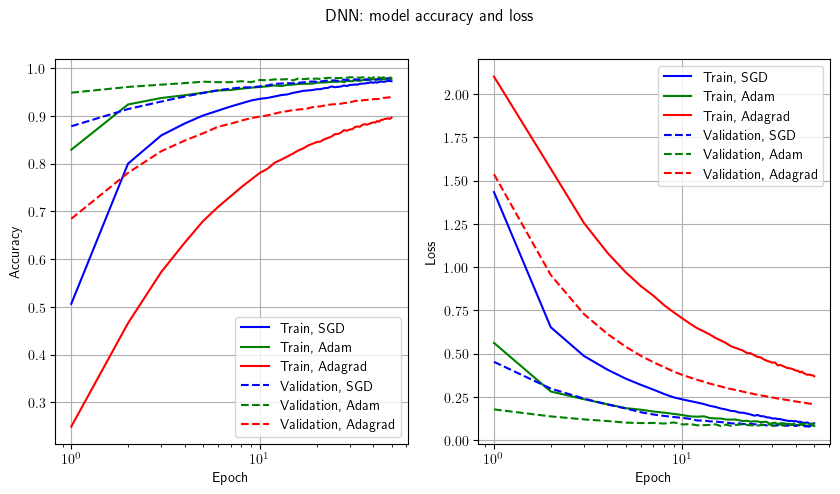

In [93]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.models import load_model

import json

# Caricamento delle histories
with open('DNN_SGD.json', 'r') as f:
    history1 = json.load(f)
with open('DNN_Adam.json', 'r') as f:
    history2 = json.load(f)
with open('DNN_Adagrad.json', 'r') as f:
    history3 = json.load(f)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('DNN: model accuracy and loss')

# Grafico di sinistra: accuratezza
plt.subplot(1,2,1)
plt.plot(np.linspace(1, 50, 50), history1['acc'], c='b', label='Train, SGD')
plt.plot(np.linspace(1, 50, 50), history2['acc'], c='g', label='Train, Adam')
plt.plot(np.linspace(1, 50, 50), history3['acc'], c='r', label='Train, Adagrad')
plt.plot(np.linspace(1, 50, 50), history1['val_acc'], c='b', linestyle='dashed', label='Validation, SGD')
plt.plot(np.linspace(1, 50, 50), history2['val_acc'], c='g', linestyle='dashed', label='Validation, Adam')
plt.plot(np.linspace(1, 50, 50), history3['val_acc'], c='r', linestyle='dashed', label='Validation, Adagrad')

plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.xscale('log')
plt.legend()
plt.grid(True)

# Grafico di destra: funzione costo
plt.subplot(1,2,2)
plt.plot(np.linspace(1, 50, 50), history1['loss'], c='b', label='Train, SGD')
plt.plot(np.linspace(1, 50, 50), history2['loss'], c='g', label='Train, Adam')
plt.plot(np.linspace(1, 50, 50), history3['loss'], c='r', label='Train, Adagrad')
plt.plot(np.linspace(1, 50, 50), history1['val_loss'], c='b', linestyle='dashed', label='Validation, SGD')
plt.plot(np.linspace(1, 50, 50), history2['val_loss'], c='g', linestyle='dashed', label='Validation, Adam')
plt.plot(np.linspace(1, 50, 50), history3['val_loss'], c='r', linestyle='dashed', label='Validation, Adagrad')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


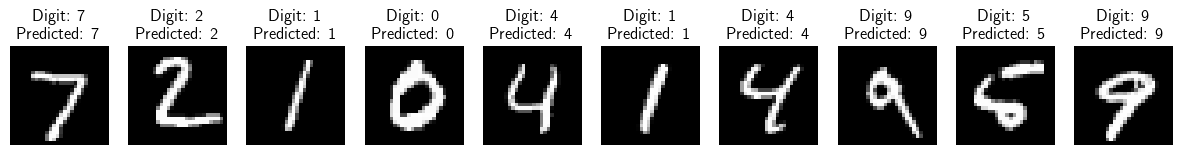

In [61]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
model_DNN = tf.keras.models.load_model(filepath='DNN_SGD.keras')
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

plt.figure(figsize=(15, 15)) 

for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


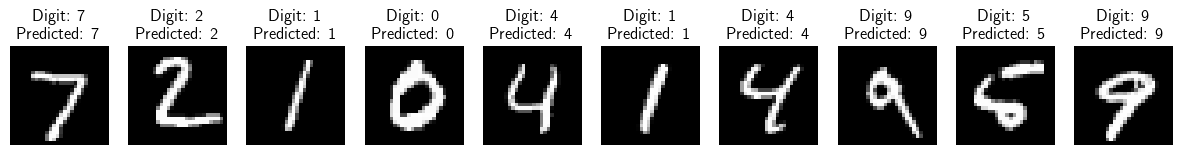

In [56]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
model_DNN = tf.keras.models.load_model(filepath='DNN_Adam.keras')
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


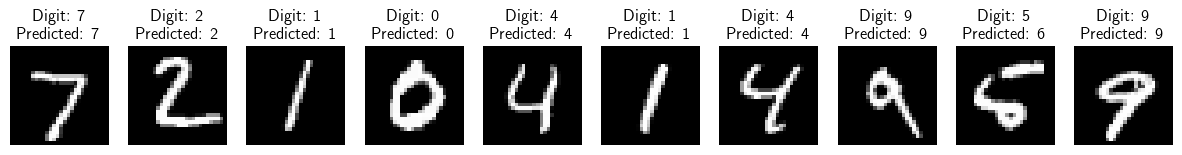

In [57]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
model_DNN = tf.keras.models.load_model(filepath='DNN_Adagrad.keras')
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Esercizio 12.2 - Implementazione

In [95]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist

np.random.seed(0) # Seleziona seme generatore random
tf.random.set_seed(0)

img_rows, img_cols = 28, 28 # Numero di pixel immagini
num_classes = 10 # Numero delle classi (cifre 0,1,...,9)

# Scarica dati di training e di validazione
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape dei dati in funzione dle backend di keras
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Imposta dati come float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Riscala 256 toni di grigio su intervallo [0,1]
X_train /= 255 
X_test /= 255

# Converti classi vettoriali in matrici binarie per categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [96]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Costruzione e compilazione della rete neurale
def create_CNN():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss = keras.losses.categorical_crossentropy,
                  optimizer = 'Adam',
                  metrics = ['acc'])
    return model

In [97]:
batch_size = 32
epochs = 50

model_CNN = create_CNN()

# Addestramento della CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (X_test, Y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - acc: 0.7043 - loss: 0.8784 - val_acc: 0.9747 - val_loss: 0.0812
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.9402 - loss: 0.2115 - val_acc: 0.9822 - val_loss: 0.0585
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.9563 - loss: 0.1595 - val_acc: 0.9863 - val_loss: 0.0453
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.9631 - loss: 0.1318 - val_acc: 0.9871 - val_loss: 0.0406
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9644 - loss: 0.1235 - val_acc: 0.9881 - val_loss: 0.0390
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.9692 - loss: 0.1102 - val_acc: 0.9882 - val_loss: 0.0386
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.9709 - loss: 0.1038 - val_acc: 0.9903 - val_loss: 0.0327
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.9711 - loss: 0.1030 - val_acc: 0.9906 - val_loss: 0.0303
Epoch 9/50
1875/1875 ━━━━━━━━━━━

In [98]:
import json

# Salvataggio del modello
model_CNN.save("CNN_Adam.keras", include_optimizer=True)

# Salvataggio history del modello
with open("CNN_Adam.json", 'w') as f:
    json.dump(history.history, f)

## Esercizio 12.2 - Risultati

In alternativa ad una DNN si può utilizzare una CNN costruita alternando strati di convoluzione a strati di pooling. L'output degli strati di convoluzione e di pooling viene poi appiattito e densamente connesso prima di restituire l'output attraverso una funzione softmax (come fatto per la DNN nell'esercizio precedente). Questa rete è addestrata utilizzando i medesimi dati presi dal dataset MNIST su 50 epoche. Viene infine applicata su alcuni esempi di cifre di questo dataset per testare il funzionamento della rete.

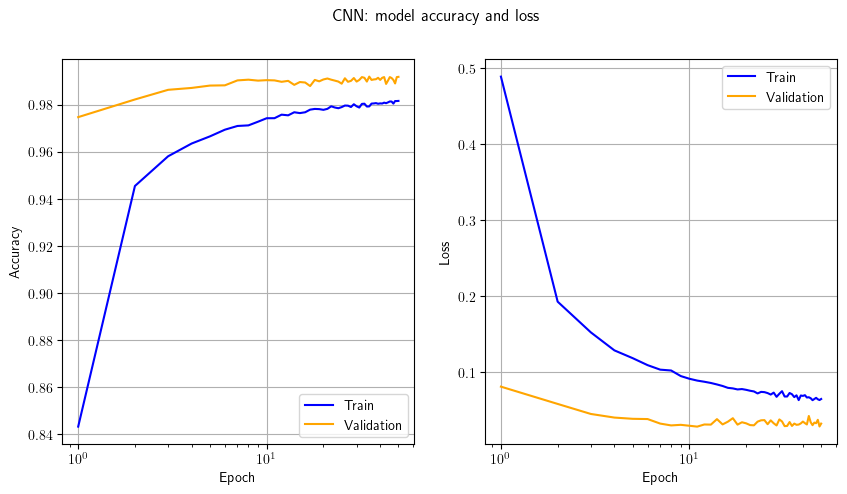

In [101]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.models import load_model

import json

# Caricamento delle histories
with open('CNN_Adam.json', 'r') as f:
    history = json.load(f)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('CNN: model accuracy and loss')

# Grafico di sinistra: accuratezza
plt.subplot(1,2,1)
plt.plot(np.linspace(1, 50, 50), history['acc'], c='b', label='Train')
plt.plot(np.linspace(1, 50, 50), history['val_acc'], c='orange', label='Validation')

plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.xscale('log')
plt.legend()
plt.grid(True)

# Grafico di destra: funzione costo
plt.subplot(1,2,2)
plt.plot(np.linspace(1, 50, 50), history['loss'], c='b', label='Train')
plt.plot(np.linspace(1, 50, 50), history['val_loss'], c='orange', label='Validation')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 28, 28, 1)


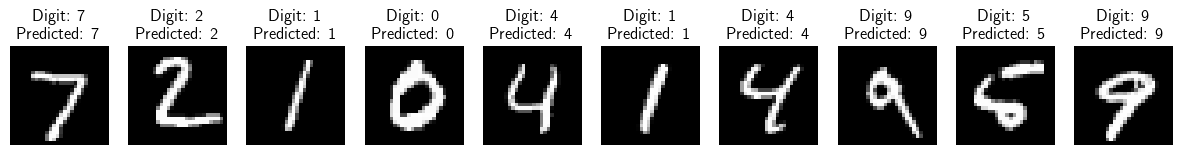

In [114]:
model_CNN = tf.keras.models.load_model(filepath='CNN_Adam.keras')
predictions = model_CNN.predict(X_test)

print(X_test.shape)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Esercizio 12.3 - Risultati

In quest'ultimo esercizio si testano la DNN e la CNN dei due esercizi precedenti per il riconoscimento di cifre scritte direttamente dall'utente. Questo è un buon test per verificare il funzionamento della rete su dei dati a lei non noti in quanto non appartenenti né al set di training né a quello di validazione. Inoltre, si testa la capacità di riconoscere cifre scritte possibilmente anche con segni e stile differenti da quello dei dati di MNIST (ad esempio il numero 7 scritto con o senza trattino, il numero 1 scritto come unico trattino o con tratto spezzato ecc.).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


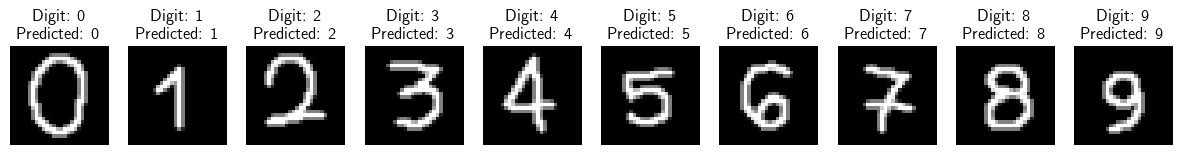

In [124]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

model_DNN = tf.keras.models.load_model(filepath='DNN_Adam.keras')

plt.figure(figsize=(15, 5)) 

for i in range(10):  # Ciclo per tutte e dieci le immagini
    digit_filename = f"./Numeri/Number_{i}.png"  # Nome del file dell'immagine
    digit_in = Image.open(digit_filename).convert('L')  # Carica l'immagine in scala di grigi
    ydim, xdim = digit_in.size  # Acquisisci le dimensioni dell'immagine
    pix = digit_in.load()  # Carica i pixel dell'immagine in un array numpy
    
    # Normalizza i valori dei pixel nell'intervallo [0, 1]
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k, j] = pix[j, k] / 255

    # Determina predizione del modello
    data = data.reshape(1, xdim*ydim)
    pred = model_DNN.predict(data)
    data = data.reshape(xdim, ydim)
    
    # Visualizza cifre e predizioni
    plt.subplot(1, 10, i + 1)  
    plt.imshow(data, cmap='gray')  
    plt.title("Digit: {}\nPredicted:    {}".format(i, np.argmax(pred)))
    plt.axis('off') 

plt.show() 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


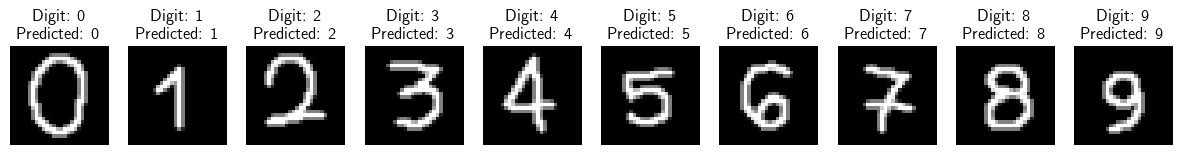

In [123]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

model_CNN = tf.keras.models.load_model(filepath='CNN_Adam.keras')

plt.figure(figsize=(15, 5)) 

for i in range(10):  # Ciclo per tutte e dieci le immagini
    digit_filename = f"./Numeri/Number_{i}.png"  # Nome del file dell'immagine
    digit_in = Image.open(digit_filename).convert('L')  # Carica l'immagine in scala di grigi
    ydim, xdim = digit_in.size  # Acquisisci le dimensioni dell'immagine
    pix = digit_in.load()  # Carica i pixel dell'immagine in un array numpy
    
    # Normalizza i valori dei pixel nell'intervallo [0, 1]
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k, j] = pix[j, k] / 255

    # Determina predizione del modello
    data = data.reshape(1, ydim, xdim, 1)
    pred = model_CNN.predict(data)
    data = data.reshape(xdim, ydim)
    
    # Visualizza cifre e predizioni
    plt.subplot(1, 10, i + 1)
    plt.imshow(data, cmap='gray')  
    plt.title("Digit: {}\nPredicted:    {}".format(i, np.argmax(pred))) 
    plt.axis('off') 

plt.show() 